<a href="https://colab.research.google.com/github/classysai/spam-ham/blob/main/Text_Analytics_and_classification_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
s=["Please note that negative number in the file represents debit balance payable by you",
   "the funds and securities balances provided are what is maintained with your broker and does not include balance in your personal bank account and demat account"]

In [4]:
type(s)

list

#Tokanization : spliting the data


In [5]:
s[0].split()

['Please',
 'note',
 'that',
 'negative',
 'number',
 'in',
 'the',
 'file',
 'represents',
 'debit',
 'balance',
 'payable',
 'by',
 'you']

#sparse representation : Lots of zeros
#Multi Dimensionl Data : Curse of Dimensionality














In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vect=CountVectorizer(stop_words="english")
op=vect.fit_transform(s).toarray()
op

array([[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1]])

In [7]:
import pandas as pd
df=pd.DataFrame(op,columns=vect.get_feature_names())
df


,account,balance,balances,bank,broker,debit,demat,does,file,funds,include,maintained,negative,note,number,payable,personal,provided,represents,securities
0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0
1,2,1,1,1,1,0,1,1,0,1,1,1,0,0,0,0,1,1,0,1


In [8]:
df.shape

(2, 20)

#TFIDF(TERM FREQUENCY INVERSE DOCUMENT FREQUENCY)
*  how relevent a word is to a document in a collection of multiple document
*   it shows the weightage of a word








In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(stop_words="english")
op=vect.fit_transform(s).toarray()
df=pd.DataFrame(op,columns=vect.get_feature_names())
df

,account,balance,balances,bank,broker,debit,demat,does,file,funds,include,maintained,negative,note,number,payable,personal,provided,represents,securities
0,0.000000,0.259698,0.000000,0.000000,0.000000,0.364996,0.000000,0.000000,0.364996,0.000000,0.000000,0.000000,0.364996,0.364996,0.364996,0.364996,0.000000,0.000000,0.364996,0.000000
1,0.507898,0.180687,0.253949,0.253949,0.253949,0.000000,0.253949,0.253949,0.000000,0.253949,0.253949,0.253949,0.000000,0.000000,0.000000,0.000000,0.253949,0.253949,0.000000,0.253949


In [10]:
import pandas as pd
path="https://raw.githubusercontent.com/diazonic/Machine-Learning-using-sklearn/master/Datasets/spam.tsv"
df=pd.read_table(path)
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [11]:
df.shape

(5572, 4)

#find how many ham and spam messeges are there and plot a bar graph

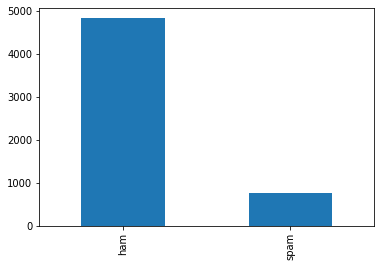

In [12]:
df["label"].value_counts().plot(kind="bar")
#Imbalanced Dataset 
#Only accuracy isnt sufficient also need ["Precision and recall are used for imbalanced dataset "]

# take Input and output from the data

In [13]:
x=df["message"].values
y=df["label"].values

#split the data

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [34]:
print(x_train.shape)
print(x_test.shape)

(4179,)
(1393,)


In [16]:
import numpy as np
np.unique(y_train,return_counts=True)

(array(['ham', 'spam'], dtype=object), array([3617,  562]))

In [17]:
np.unique(y_test,return_counts=True)

(array(['ham', 'spam'], dtype=object), array([1208,  185]))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [19]:
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [20]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [21]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.9856424982053122

In [23]:
confusion_matrix(y_pred,y_test)

array([[1208,   20],
       [   0,  165]])

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1228
        spam       0.89      1.00      0.94       165

    accuracy                           0.99      1393
   macro avg       0.95      0.99      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [55]:
#evaluate for a specific message
text=df["message"][10]
text

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [54]:
df["label"][10]

'ham'

In [27]:
text=vect.transform([text])
model.predict(text)

array(['spam'], dtype=object)

In [28]:
#1.Gather the data & i/p and o/p
#2.spliting of data
#3.apply Tfidf vectorizer
#4.use svm algorithm import (SVC model)
#5.predict for test data

In [29]:
#if we want to predict for something new which is not in train or test
#1.apply tranform of Tfidf
#2.model.predict
#example:
text=vect.transform(s)

In [30]:
model.predict(text)

array(['ham', 'ham'], dtype=object)

#Pipeline in sklearn

In [31]:
from sklearn.pipeline import Pipeline
text_model=Pipeline([("vect",TfidfVectorizer()),("model",SVC())])

In [35]:
text_model.fit(x_train,y_train)
#fit_tranform for train the data in Tfidf
#fit for training the data in Pipeline


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', de

In [36]:
y_pred=text_model.predict(x_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [37]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [38]:
accuracy_score(y_pred,y_test)

0.9856424982053122

In [39]:
text=(s)

In [43]:
text_model.predict(text)

array(['ham', 'ham'], dtype=object)

#saving your model with complete pipeline (Serialization(dump) and deserialization(load))

1.   pickle
2.   Joblib
3.   sklearn.Json



In [44]:
import joblib
joblib.dump(text_model,"spam-ham") 

['spam-ham']